In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv("Bank_Personal_Loan_Modelling_train.csv")
df_reserve = pd.read_csv("Bank_Personal_Loan_Modelling_reserved.csv")

In [122]:
df.drop(['ID'], axis=1, inplace=True)
df_reserve.drop(['ID'], axis=1, inplace=True)

In [123]:
df.drop(['ZIP Code'], axis=1, inplace=True)
df_reserve.drop(['ZIP Code'], axis=1, inplace=True)

In [124]:
df['Experience'] = df['Experience'] - df['Experience'].min()
df_reserve['Experience'] = df_reserve['Experience'] - df_reserve['Experience'].min()

In [125]:
df['CCAvg'] = df['CCAvg']*12
df_reserve['CCAvg'] = df_reserve['CCAvg']*12

Remove outliers

In [126]:
import scipy

zscore = scipy.stats.zscore(df["Mortgage"])
np.sum(zscore > 2)

215

<Axes: xlabel='Mortgage', ylabel='Count'>

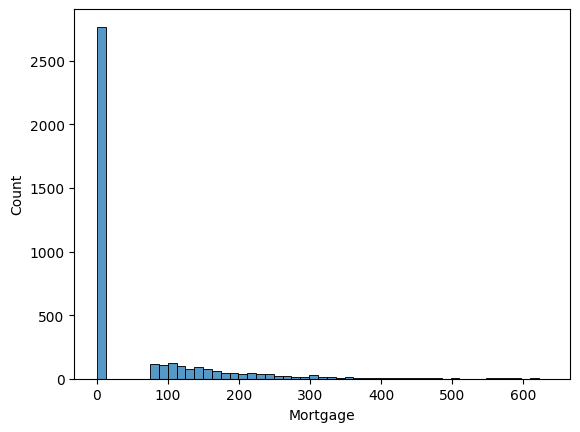

In [127]:
sns.histplot(df["Mortgage"])

In [128]:
row_to_drop = np.where(zscore > 3)
df.drop(df.index[row_to_drop], inplace=True)

<Axes: xlabel='Mortgage', ylabel='Count'>

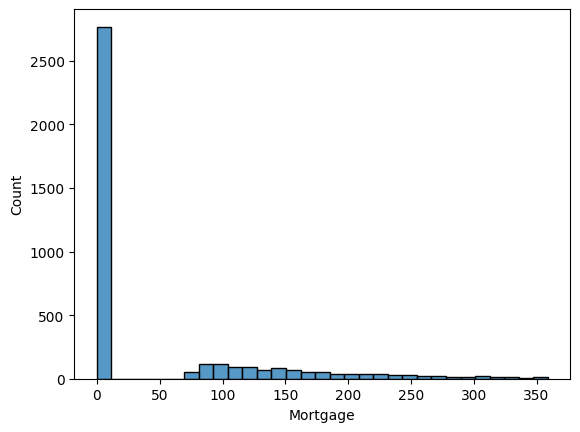

In [129]:
sns.histplot(df["Mortgage"])

Train

In [130]:
# for training data
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']
# for reserve data
X_reserve = df_reserve

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dtc = DecisionTreeClassifier(random_state=13, criterion='gini', class_weight='balanced')
dtc.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', random_state=13)

In [132]:
y_pred = dtc.predict(X_reserve)
print(y_pred)
y_pred = pd.DataFrame(y_pred)
y_pred.T.to_csv('DT_reserve.csv', index=False, header=False)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 